# **Proiect Predicție popularitate melodii - ML**

## **Încărcarea setului de date în notebook**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('SpotifyFeatures.csv')
df

genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acousticness  danceability  \
0       0BRjO6ga9RKCKjfDqeFgWV           0       0.61100         0.389   
1       0BjC1NfoEOOusryehmNudP           1       0.24600         0.590   
2       0CoSDzoNIKCRs124s9uTVy           3       0.95200         0.663   
3       0Gc6TVm52BwZD07Ki6tIvf           0       0.70300         0.240   
4       0IuslXpMROHdEPvSl1fTQK           4       0.95000         0.331   
...                        ...         ...           ...           ...   
232720  2XGLdVl7lGeq8ksM6Al7jT          39       0.00384         0.687   
232721  1qWZdkBl4UVPj9lK6HuuFM          38       0.03290         0.785   
232722  2ziWXUmQLrXTiYjCg2fZ2t          47       0.90100         0.517   
232723  6EFsue2YbIG4Qkq8Zr9Rir          44       0.26200         0.745   
232724  34XO9RwPMKjbvRry54QzWn          35       0.09730         0.758   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0             99373   0.910          0.000000  C#    0.3460    -1.828  Major   
1            137373   0.737          0.000000  F#    0.1510    -5.559  Minor   
2            170267   0.131          0.000000   C    0.1030   -13.879  Minor   
3            152427   0.326          0.000000  C#    0.0985   -12.178  Major   
4             82625   0.225          0.123000   F    0.2020   -21.150  Major   
...             ...     ...               ...  ..       ...       ...    ...   
232720       326240   0.714          0.544000   D    0.0845   -10.626  Major   
232721       282447   0.683          0.000880   E    0.2370    -6.944  Minor   
232722       166960   0.419          0.000000   D    0.0945    -8.282  Major   
232723       222442   0.704          0.000000   A    0.3330    -7.137  Major   
232724       323027   0.470          0.000049  G#    0.0836    -6.708  Minor   

        speechiness    tempo time_signature  valence  
0            0.0525  166.969            4/4    0.814  
1            0.0868  174.003            4/4    0.816  
2            0.0362   99.488            5/4    0.368  
3            0.0395  171.758            4/4    0.227  
4            0.0456  140.576            4/4    0.390  
...             ...      ...            ...      ...  
232720       0.0316  115.542            4/4    0.962  
232721       0.0337  113.830            4/4    0.969  
232722       0.1480   84.135            4/4    0.813  
232723       0.1460  100.031            4/4    0.489  
232724       0.0287  113.897            4/4    0.479  

[232725 rows x 18 columns]

### **Ștergem valorile nule**

In [2]:
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [3]:
df.dropna(axis=0, how='any', inplace=True)


In [4]:
df.dropna(axis=1, how='any', inplace=True)


In [5]:
df_result = df.dropna(subset=['track_name'])

In [6]:
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

## **Prepararea datelor**

In [7]:
df.describe().transpose()

count           mean            std          min  \
popularity        232724.0      41.127490      18.189986      0.00000   
acousticness      232724.0       0.368562       0.354768      0.00000   
danceability      232724.0       0.554366       0.185608      0.05690   
duration_ms       232724.0  235121.845568  118935.926327  15387.00000   
energy            232724.0       0.570958       0.263456      0.00002   
instrumentalness  232724.0       0.148302       0.302769      0.00000   
liveness          232724.0       0.215010       0.198273      0.00967   
loudness          232724.0      -9.569896       5.998215    -52.45700   
speechiness       232724.0       0.120765       0.185519      0.02220   
tempo             232724.0     117.666494      30.898942     30.37900   
valence           232724.0       0.454919       0.260065      0.00000   

                          25%            50%          75%          max  
popularity            29.0000      43.000000      55.0000      100.000  
acousticness           0.0376       0.232000       0.7220        0.996  
danceability           0.4350       0.571000       0.6920        0.989  
duration_ms       182856.2500  220427.000000  265768.0000  5552917.000  
energy                 0.3850       0.605000       0.7870        0.999  
instrumentalness       0.0000       0.000044       0.0358        0.999  
liveness               0.0974       0.128000       0.2640        1.000  
loudness             -11.7710      -7.762000      -5.5010        3.744  
speechiness            0.0367       0.050100       0.1050        0.967  
tempo                 92.9590     115.777500     139.0545      242.903  
valence                0.2370       0.444000       0.6600        1.000

### **Informații despre tipurile de date in setul de date**

In [8]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232724 non-null  object 
 1   artist_name       232724 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232724 non-null  object 
 4   popularity        232724 non-null  int64  
 5   acousticness      232724 non-null  float64
 6   danceability      232724 non-null  float64
 7   duration_ms       232724 non-null  int64  
 8   energy            232724 non-null  float64
 9   instrumentalness  232724 non-null  float64
 10  key               232724 non-null  object 
 11  liveness          232724 non-null  float64
 12  loudness          232724 non-null  float64
 13  mode              232724 non-null  object 
 14  speechiness       232724 non-null  float64
 15  tempo             232724 non-null  float64
 16  time_signature    232724 

### **Reprezentarea grafică a distribuției popularității în setul de date**

Text(0.5, 1.0, 'Distrbuția popularității')

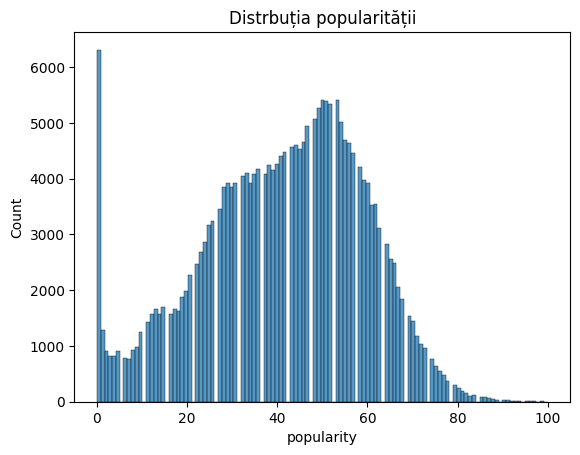

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['popularity']).set_title('Distrbuția popularității')

## **Top 10 artiști în funcție de numărul de cântece**

In [10]:
artist_counts = df['artist_name'].value_counts()
artist_counts

artist_name
Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
                            ... 
Zubin Mehta                    1
Shawn Lane                     1
Claudio Arrau                  1
Charles Daellenbach            1
Jr Thomas & The Volcanos       1
Name: count, Length: 14564, dtype: int64

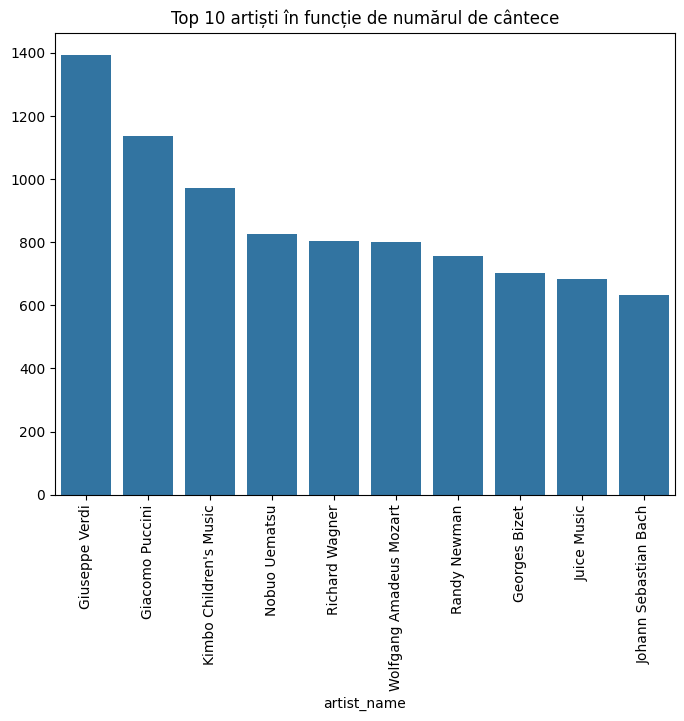

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

top_artists = artist_counts.head(10)
top_artists

plt.figure(figsize=(8, 6))
top_10_artists = df['artist_name'].value_counts().head(10)
sns.barplot(x=top_10_artists.index, y=top_10_artists.values)
plt.title('Top 10 artiști în funcție de numărul de cântece')
plt.xticks(rotation=90)
plt.show()


## **Numărul de melodii pentru fiecare gen muzical**

In [26]:
songs_per_genre = df['genre'].value_counts()
songs_per_genre



genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9095
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64

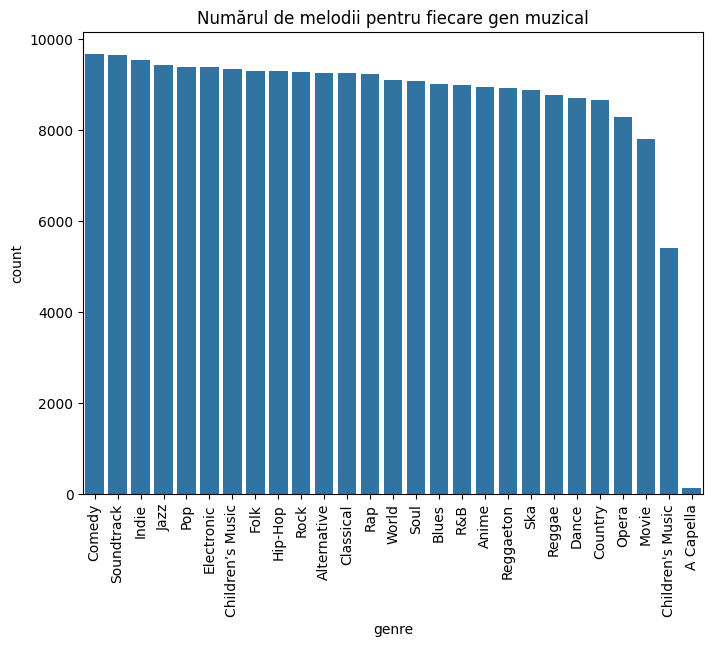

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Numărul de melodii pentru fiecare gen muzical')
plt.xticks(rotation=90)
plt.show()

## **Top 10 melodii cu cea mai mare durată**

In [28]:
top_10_longest_songs = df.sort_values('duration_ms', ascending=False).head(10)['track_name']
top_10_longest_songs

212083    Episodio 15 (Lady Orinoco, Políticas De Youtub...
162671                                            6 : 00 Am
23593                                   Lost Lands 2017 Mix
211969         Episodio 14 (Machismo, Juanga, Bebé a Bordo)
219057    Nature Sounds for Sleep: Crackling Log Fire wi...
174078                         Three Radio Men and a Steek!
172064                      Lo Que No Le Dirías a Tu Pareja
36982                              Late Night Tales: Bonobo
181515                             Late Night Tales: Bonobo
221608       Late Night Tales: Jon Hopkins - Continuous Mix
Name: track_name, dtype: object

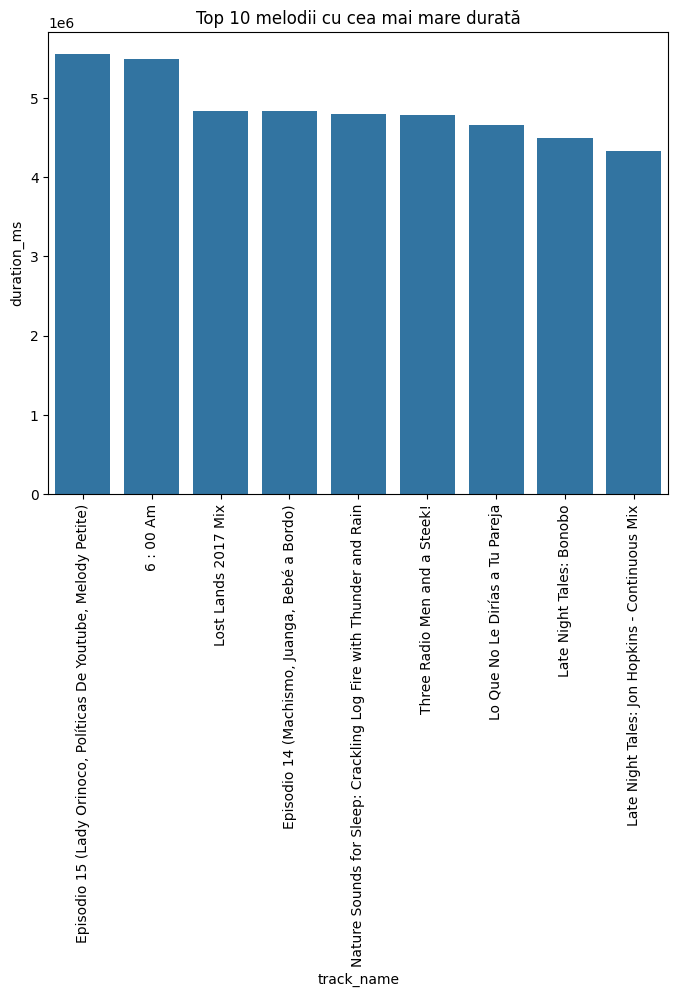

In [29]:
plt.figure(figsize=(8, 6))
top_10_longest_songs = df.sort_values('duration_ms', ascending=False).head(10)
sns.barplot(x='track_name', y='duration_ms', data=top_10_longest_songs)
plt.title('Top 10 melodii cu cea mai mare durată')
plt.xticks(rotation=90)
plt.show()

### **Top 10 melodii cu cea mai mare energie**

In [30]:
top_10_high_energy_songs = df.sort_values('energy', ascending=False).head(10)['track_name']
top_10_high_energy_songs

157871                           In Hell
24427                             Wicked
186488             Undertaker, Undertake
177575                             ObZen
21942                           No Limit
19270                     Caramelldansen
191796              Invisible Government
31965     fortissimo-the ultimate crisis
189678                        The Change
27959                  Burst the Gravity
Name: track_name, dtype: object

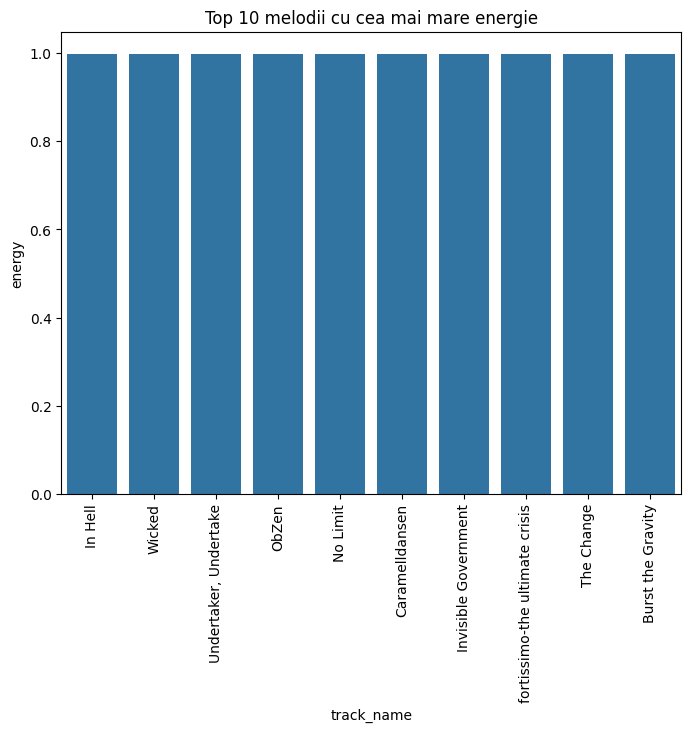

In [31]:
plt.figure(figsize=(8, 6))
top_10_high_energy_songs = df.sort_values('energy', ascending=False).head(10)
sns.barplot(x='track_name', y='energy', data=top_10_high_energy_songs)
plt.title('Top 10 melodii cu cea mai mare energie')
plt.xticks(rotation=90)
plt.show()

### **Top 10 genuri de muzică**

In [12]:
genre_counts = df['genre'].value_counts()
genre_counts

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9095
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64

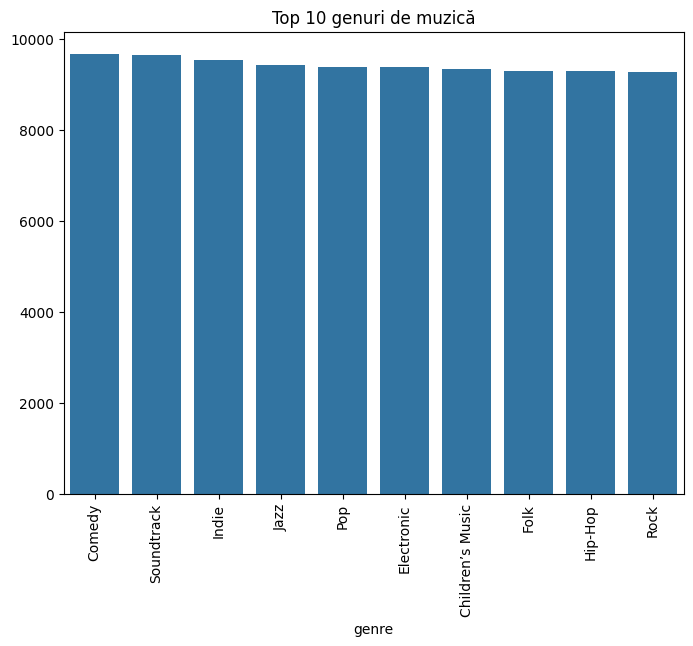

In [32]:
plt.figure(figsize=(8, 6))
top_10_genres = df['genre'].value_counts().head(10)
sns.barplot(x=top_10_genres.index, y=top_10_genres.values)
plt.title('Top 10 genuri de muzică')
plt.xticks(rotation=90)
plt.show()

In [14]:
genre_popularity = df.groupby('genre')['popularity'].mean()

top_genres = genre_popularity.sort_values(ascending=False)

top_genres

genre
Pop                 66.590667
Rap                 60.533795
Rock                59.619392
Hip-Hop             58.423131
Dance               57.275256
Indie               54.701561
Children’s Music    54.659040
R&B                 52.308719
Alternative         50.213430
Folk                49.940209
Soul                47.027836
Country             46.100416
Jazz                40.824383
Electronic          38.056095
Reggaeton           37.742915
Reggae              35.589328
World               35.523145
Blues               34.742879
Soundtrack          33.954800
Classical           29.282195
Ska                 28.612351
Anime               24.258729
Comedy              21.342630
Opera               13.335628
Movie               12.174097
A Capella            9.302521
Children's Music     4.252637
Name: popularity, dtype: float64

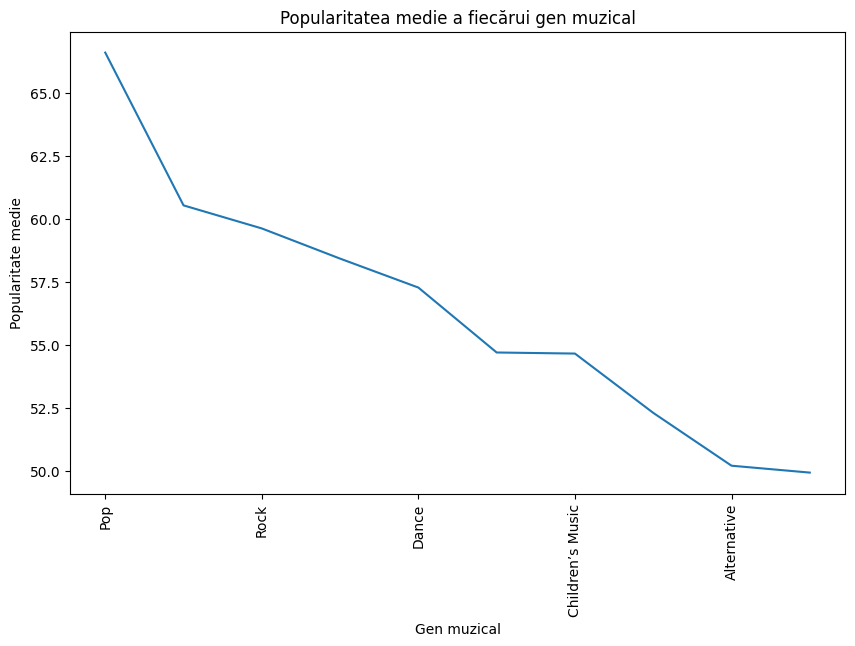

In [33]:
plt.figure(figsize=(10, 6))
top_genres.plot(kind='line')
plt.title('Popularitatea medie a fiecărui gen muzical')
plt.xlabel('Gen muzical')
plt.ylabel('Popularitate medie')
plt.xticks(rotation=90)
plt.show()

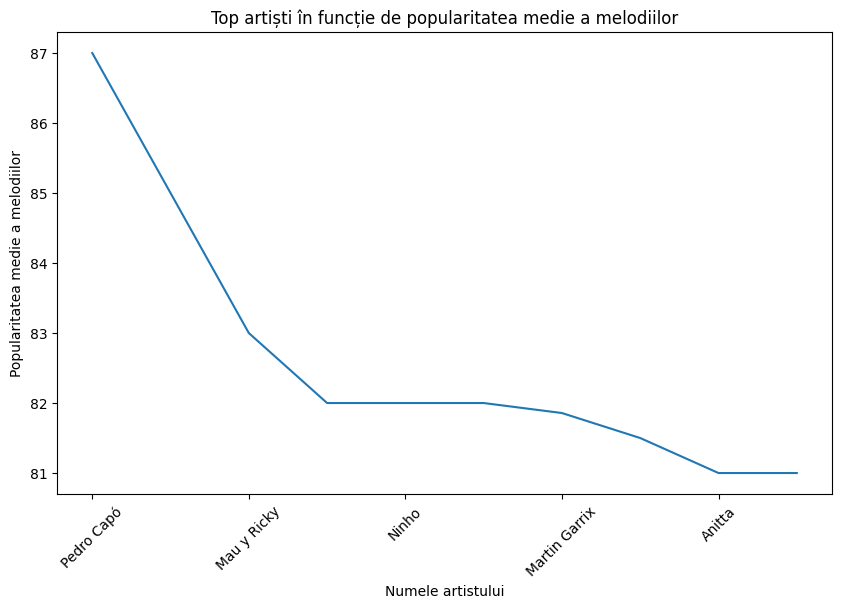

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_df = df.groupby('artist_name')['popularity'].mean()

top_artists = grouped_df.nlargest(10)
plt.figure(figsize=(10, 6))
top_artists.plot(kind='line')
plt.xlabel('Numele artistului')
plt.ylabel('Popularitatea medie a melodiilor')
plt.title('Top artiști în funcție de popularitatea medie a melodiilor')
plt.xticks(rotation=45)
plt.show()


### **Top 10 artiști în funcție de popularitate**

In [16]:
import pandas as pd

grouped_df = df.groupby('artist_name')['popularity'].mean()

top_artists = grouped_df.nlargest(10)

print(top_artists)


artist_name
Pedro Capó              87.000000
Mario Bautista          85.000000
Mau y Ricky             83.000000
Kris Kross Amsterdam    82.000000
Ninho                   82.000000
Paloma Mami             82.000000
Martin Garrix           81.857143
Sofia Reyes             81.500000
Anitta                  81.000000
Heuss L'enfoiré         81.000000
Name: popularity, dtype: float64


### **Top 10 genuri muzicale în funcție de popularitate**

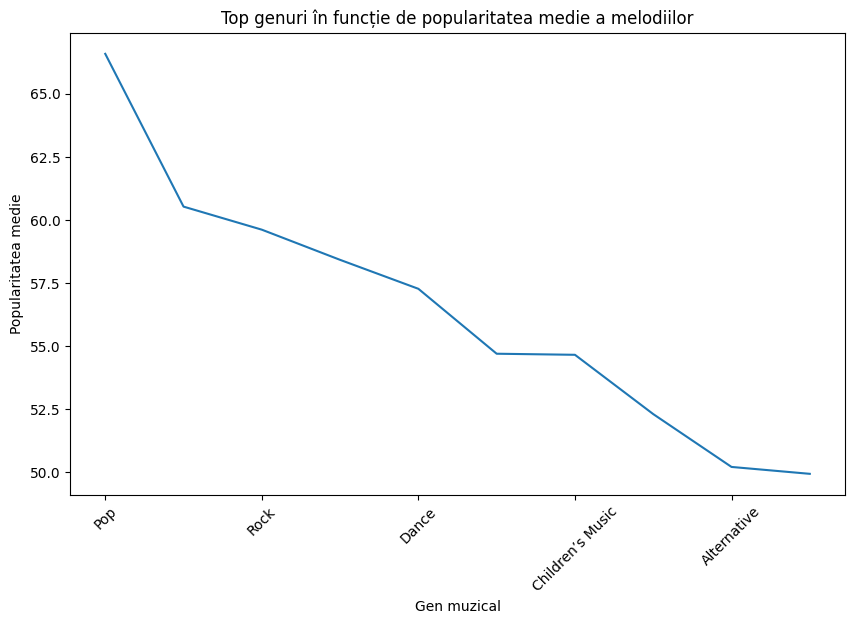

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_df = df.groupby('genre')['popularity'].mean()

top_genres = grouped_df.nlargest(10)

plt.figure(figsize=(10, 6))
top_genres.plot(kind='line')
plt.xlabel('Gen muzical')
plt.ylabel('Popularitatea medie')
plt.title('Top genuri în funcție de popularitatea medie a melodiilor')
plt.xticks(rotation=45)
plt.show()

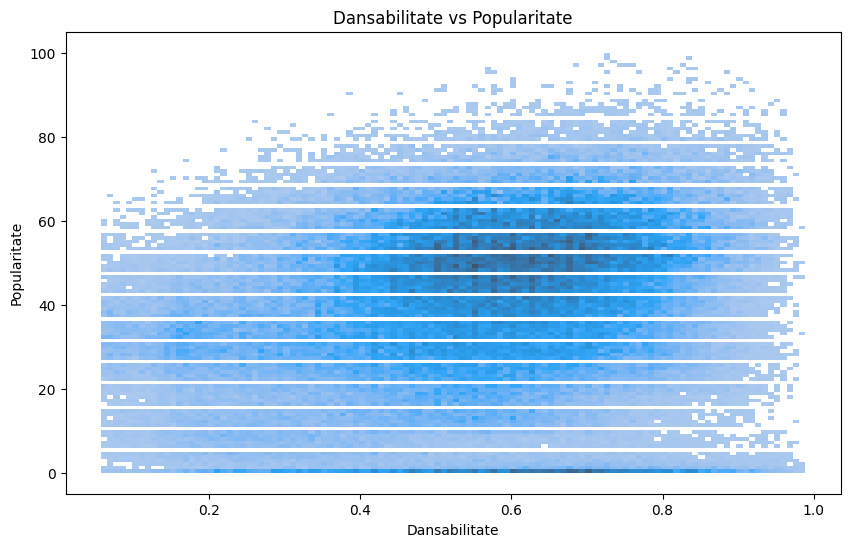

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(x='danceability', y='popularity', data=df)
plt.title('Dansabilitate vs Popularitate')
plt.xlabel('Dansabilitate')
plt.ylabel('Popularitate')
plt.show()

In [ ]:
import pandas as pd

# Group by artist and calculate mean popularity
grouped_df = df.groupby('genre')['popularity'].mean()

# Get the top artists by popularity
top_genres = grouped_df.nlargest(10)

# Print the top genres
print(top_genres)


genre
Pop                 66.590667
Rap                 60.533795
Rock                59.619392
Hip-Hop             58.423131
Dance               57.275256
Indie               54.701561
Children’s Music    54.659040
R&B                 52.308719
Alternative         50.213430
Folk                49.940209
Name: popularity, dtype: float64


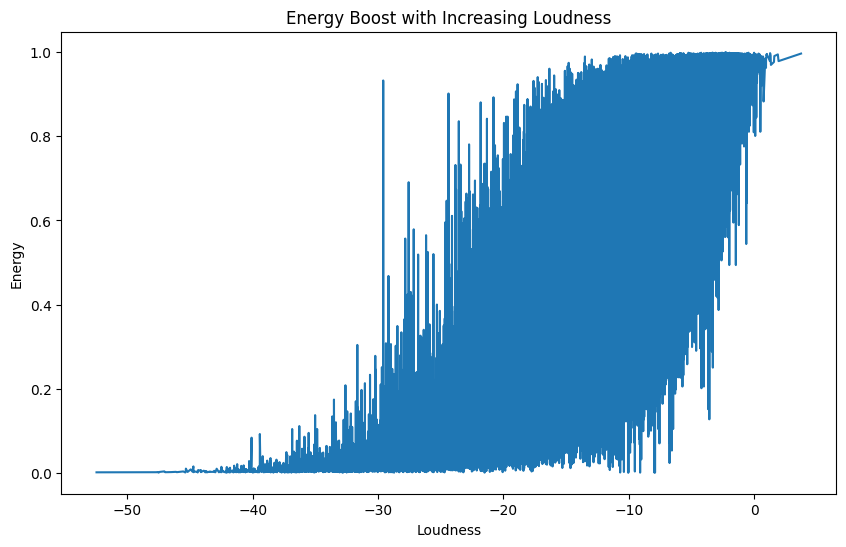

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Sort by loudness
df_sorted = df.sort_values(by='loudness')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['loudness'], df_sorted['energy'])
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Energy Boost with Increasing Loudness')
plt.show()


[Text(0.5, 1.0, 'Loudness vs Energy')]

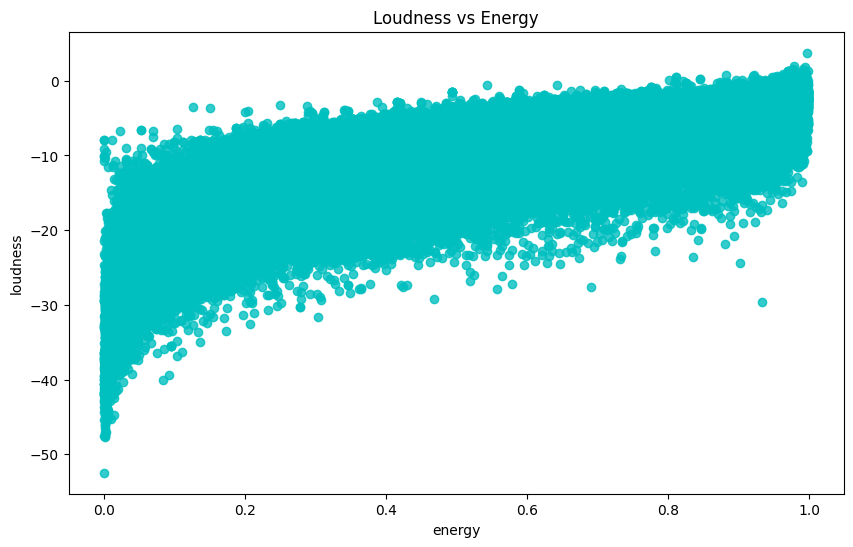

In [36]:
plt.figure(figsize=(10,6))
sns.regplot(data = df, y= "loudness", x = "energy", color = "c").set(title="Loudness vs Energy")

[Text(0.5, 1.0, 'Loudness vs Popularity')]

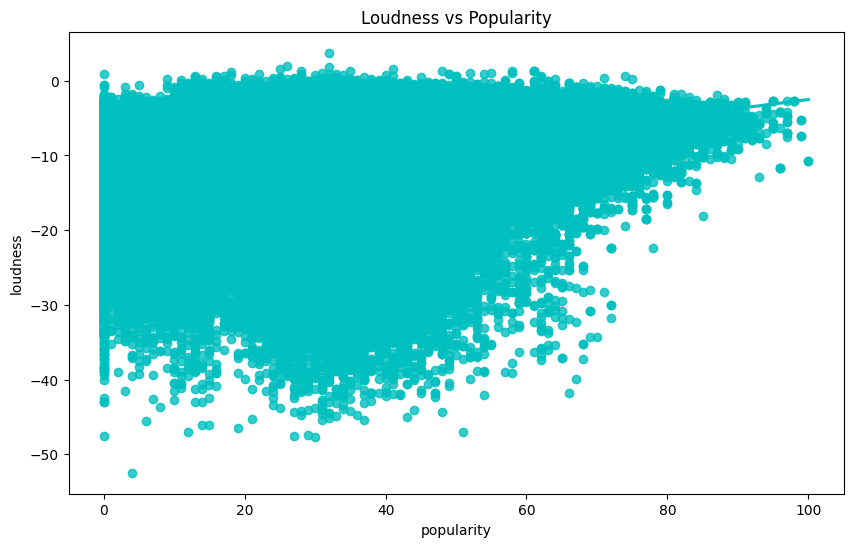

In [37]:
plt.figure(figsize=(10,6))
sns.regplot(data = df, y= "loudness", x = "popularity", color = "c").set(title="Loudness vs Popularity")

# **Calcurea index-ului Gini**

In [ ]:
import numpy as np

def gini(array):

    # transformam array-ul intr-un numpy array pentru a putea folosi funcții specifice
    array = np.array(popularity, dtype=np.float64)
    # sortam array-ul
    sorted_array = array[np.argsort(popularity)]
    # numarul total de elemente in array
    n = len(array)
    # calculam index-ul Gini
    
    coefficient = 2 * np.sum(np.arange(1, n + 1) * sorted_array) / (n * np.sum(sorted_array)) - (n + 1) / n
    return coefficient

popularity = df['popularity']
popularity = popularity.values
gini_index = gini(popularity) 
print("Gini index pentru popularitate:", gini_index)




Gini index pentru popularitate: 0.25069803654696377


In [ ]:

import numpy as np

def gini(array):

    # transformam array-ul intr-un numpy array pentru a putea folosi funcții specifice
    array = np.array(danceability, dtype=np.float64)
    # sortam array-ul
    sorted_array = array[np.argsort(danceability)]
    # numarul total de elemente in array
    n = len(array)
    # calculam index-ul Gini
    
    coefficient = 2 * np.sum(np.arange(1, n + 1) * sorted_array) / (n * np.sum(sorted_array)) - (n + 1) / n
    return coefficient

danceability = df['danceability']
danceability = danceability.values
gini_index = gini(danceability) 
print("Gini index pentru danceability:", gini_index)

Gini index pentru danceability: 0.18969256159379366


In [ ]:

import numpy as np

def gini(array):

    # transformam array-ul intr-un numpy array pentru a putea folosi funcții specifice
    array = np.array(energy, dtype=np.float64)
    # sortam array-ul
    sorted_array = array[np.argsort(energy)]
    # numarul total de elemente in array
    n = len(array)
    # calculam index-ul Gini
    
    coefficient = 2 * np.sum(np.arange(1, n + 1) * sorted_array) / (n * np.sum(sorted_array)) - (n + 1) / n
    return coefficient

energy = df['energy']
energy = energy.values
gini_index = gini(energy) 
print("Gini index pentru energy:", gini_index)

Gini index pentru energy: 0.2633176132869215


## **Entropia într-o coloană din set-ul de date**


In [ ]:
from scipy.stats import entropy

def calculate_entropy(data):
    # calculam frecventele valorilor
    value_counts = data.value_counts()
    # calculam probabilitatile valorilor
    probabilities = value_counts / len(data)
    # calculam entropia
    entropy_value = entropy(probabilities, base=2)
    return entropy_value

In [ ]:
target_entropy = calculate_entropy(df['popularity'])
print("Entropia coloanei țintă: ", target_entropy)


Entropia coloanei țintă:  6.109085800917653


In [ ]:
target_entropy = calculate_entropy(df['energy'])
print("Entropia coloanei țintă: ", target_entropy)


Entropia coloanei țintă:  10.100551656840294


In [ ]:
target_entropy = calculate_entropy(df['danceability'])
print("Entropia coloanei țintă: ", target_entropy)


Entropia coloanei țintă:  9.551921529124074


In [ ]:
target_entropy = calculate_entropy(df['loudness'])
print("Entropia coloanei țintă: ", target_entropy)


Entropia coloanei țintă:  14.044113673859895


In [ ]:
target_entropy = calculate_entropy(df['track_id'])
print("Entropia coloanei țintă: ", target_entropy)

Entropia coloanei țintă:  17.25921039242899


In [ ]:
target_entropy = calculate_entropy(df['genre'])
print("Entropia coloanei țintă: ", target_entropy)

Entropia coloanei țintă:  4.697628980171278


# **Matrice de corelație**


In [ ]:
# selectam doar coloanele numerice
df_numeric = df.select_dtypes(include=[np.number])

# calculam matricea de corelatie
correlation_matrix = df_numeric.corr()

# Afișăm matricea de corelație
print(correlation_matrix)

                  popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.381295      0.256567     0.002347   
acousticness       -0.381295      1.000000     -0.364554     0.011207   
danceability        0.256567     -0.364554      1.000000    -0.125776   
duration_ms         0.002347      0.011207     -0.125776     1.000000   
energy              0.248922     -0.725580      0.325806    -0.030548   
instrumentalness   -0.210983      0.316153     -0.364946     0.076023   
liveness           -0.167995      0.069001     -0.041688     0.023785   
loudness            0.363011     -0.690202      0.438673    -0.047620   
speechiness        -0.151076      0.150933      0.134558    -0.016169   
tempo               0.081039     -0.238245      0.021943    -0.028459   
valence             0.060078     -0.325807      0.547150    -0.141806   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.248922         -0.2109

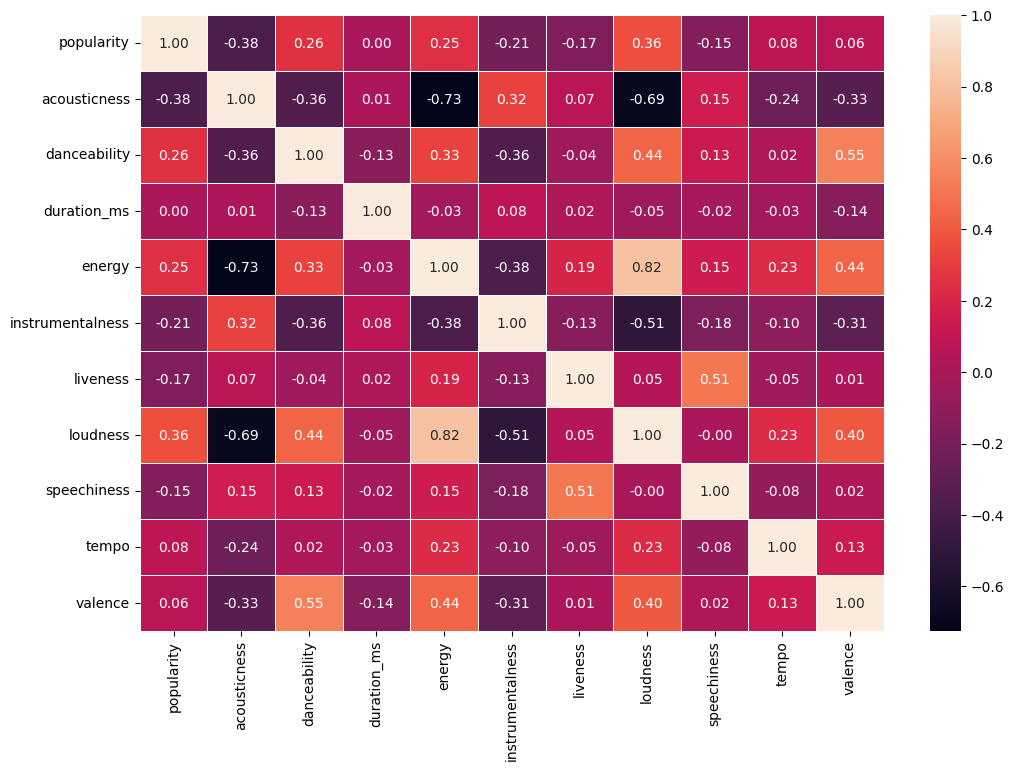

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# cream un heatmap pentru matricea de corelatie
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)

# afisam heatmap-ul
plt.show()

### **Conversia valorilor de tip string in valori numerice**

In [ ]:
list_of_keys = df['key'].unique()
for i in range(len(list_of_keys)):
    df.loc[df['key'] == list_of_keys[i], 'key'] = i
df.sample(5)

genre        artist_name                           track_name  \
24012   Electronic        The Prodigy           Voodoo People (Remastered)   
162936   Reggaeton      Yaga & Mackie                          La Batidora   
230947        Soul      Amy Winehouse               Best Friend - Acoustic   
69865      Hip-Hop  Waka Flocka Flame  Against All Odds (feat. Gucci Mane)   
129959   Classical     André Laplante             À La Manière De Borodine   

                      track_id  popularity  acousticness  danceability  \
24012   1dWteEXxzhg5xGNZZ6dJQX          55       0.00144         0.667   
162936  0VcgthG5bp78eh1lOoCFWq          23       0.32500         0.853   
230947  11DpzO37X3lrvDLS5dYta1          35       0.80800         0.638   
69865   4HpSm0AUftfiUrtNl4FGDg          24       0.03780         0.707   
129959  3L5towaxijMhqVLLdNWIwD          27       0.99100         0.281   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
24012        387067  0.9980           0.42300   1     0.301    -5.892  Minor   
162936       240400  0.9180           0.00254   9     0.297    -3.231  Minor   
230947       206813  0.1590           0.00000   7     0.167   -10.610  Minor   
69865        209627  0.4080           0.00000   3     0.204   -10.140  Minor   
129959        90674  0.0744           0.87700   0     0.104   -24.096  Major   

        speechiness    tempo time_signature  valence  
24012        0.0650  149.012            4/4   0.3200  
162936       0.2490   96.984            4/4   0.8760  
230947       0.0511   78.502            4/4   0.3290  
69865        0.3020  151.384            4/4   0.5520  
129959       0.0415  105.335            4/4   0.0449

In [ ]:
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0
df.sample(5)

genre   artist_name  \
184346        Movie   Alan Menken   
1455    Alternative   Frank Ocean   
195543        Movie  Mike Douglas   
207018   Soundtrack  Howard Shore   
68967       Hip-Hop         Drake   

                                           track_name                track_id  \
184346  Epiphany/Savages (Part 2) - Alternate Version  6bCPsp0eJ7RVubwHvXt08q   
1455                                       Skyline To  4xR3MAscflQ262kMeiKshQ   
195543                                      Real Love  2wFM1hqeCh0FkWhsLpbUys   
207018                            Sons Of The Steward  2e0NOJ4E3VeSqiVsXXiKxe   
68967                                 Wu-Tang Forever  6KziiQUOoCmC7Kc7Rv4jar   

        popularity  acousticness  danceability  duration_ms  energy  \
184346          19        0.9440         0.261       121653  0.3360   
1455            60        0.8820         0.423       184600  0.2940   
195543           1        0.8100         0.435       140347  0.3550   
207018          27        0.9540         0.129       362547  0.0168   
68967           58        0.0474         0.832       217680  0.4270   

        instrumentalness key  liveness  loudness mode  speechiness    tempo  \
184346          0.006680   4    0.0815   -12.102    0       0.0529   71.860   
1455            0.000005   3    0.0981   -13.673    0       0.0593  129.146   
195543          0.000000  11    0.1620   -12.633    1       0.0309   94.162   
207018          0.870000   5    0.1120   -27.903    0       0.0395  145.479   
68967           0.000000   7    0.1010    -8.516    0       0.2570   99.935   

       time_signature  valence  
184346            4/4   0.1380  
1455              4/4   0.4010  
195543            4/4   0.6690  
207018            3/4   0.0322  
68967             4/4   0.3690

In [ ]:
list_of_time_signatures = df['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    df.loc[df['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
df.sample(5)

genre          artist_name  \
116797    Rap          Kodak Black   
21358   Dance           Bananarama   
187136    Ska         The Slackers   
82964   Opera  Carl Heinrich Graun   
145412  Indie              Whitney   

                                               track_name  \
116797                                  Gave It All I Got   
21358                                    I Heard a Rumour   
187136                                         Walking On   
82964   Passions, BC D 10: No. 3, Fürwahr, er trug uns...   
145412                                          The Falls   

                      track_id  popularity  acousticness  danceability  \
116797  6O5plClCxL4fZFgsMRAYgT          58        0.5280         0.684   
21358   1VfRNqurZVZ0eG5stJXQWd          49        0.0977         0.666   
187136  0mpDVGP64H7envMbMz2Tp7          22        0.3170         0.540   
82964   5N6IqMnULic3ox2vDucgQ9          10        0.9820         0.334   
145412  3vdn6X5qlq6GZ1BjwdLr18          47        0.8350         0.688   

        duration_ms  energy  instrumentalness key  liveness  loudness mode  \
116797       213029  0.6090          0.000000   0     0.132    -8.638    1   
21358        204336  0.9620          0.000054  11     0.196    -4.087    0   
187136       341893  0.7380          0.000000  10     0.318    -5.885    0   
82964         95387  0.0803          0.794000   7     0.111   -18.694    0   
145412       140693  0.7000          0.325000   9     0.121    -5.695    1   

        speechiness    tempo time_signature  valence  
116797       0.0787  145.077              0    0.249  
21358        0.0380  123.372              0    0.920  
187136       0.1040  133.679              0    0.227  
82964        0.0350  117.704              0    0.171  
145412       0.0375  110.233              0    0.728

# **Modele pentru predicție**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.get_dummies(df, columns=['genre'])

features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"] + list(df.columns[df.columns.str.startswith('genre_')])

## **Se împarte setul de date în două părți (antrenare și test)**

In [ ]:
training = df.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = df.drop(training.index)[features]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

### **Se verifică încă o dată dacă există valori nule în setul de date pentru antrenare**

In [ ]:
print(X_train.isnull().any())

acousticness              False
danceability              False
duration_ms               False
energy                    False
instrumentalness          False
key                       False
liveness                  False
mode                      False
speechiness               False
tempo                     False
time_signature            False
valence                   False
genre_A Capella           False
genre_Alternative         False
genre_Anime               False
genre_Blues               False
genre_Children's Music    False
genre_Children’s Music    False
genre_Classical           False
genre_Comedy              False
genre_Country             False
genre_Dance               False
genre_Electronic          False
genre_Folk                False
genre_Hip-Hop             False
genre_Indie               False
genre_Jazz                False
genre_Movie               False
genre_Opera               False
genre_Pop                 False
genre_R&B                 False
genre_Ra

In [ ]:
# Check for NaN values in each column of training set
print("NaN values in training set:")
print(X_train.isna().sum())

# Check for NaN values in each column of testing set
print("\nNaN values in testing set:")
print(X_valid.isna().sum())

NaN values in training set:
acousticness              0
danceability              0
duration_ms               0
energy                    0
instrumentalness          0
key                       0
liveness                  0
mode                      0
speechiness               0
tempo                     0
time_signature            0
valence                   0
genre_A Capella           0
genre_Alternative         0
genre_Anime               0
genre_Blues               0
genre_Children's Music    0
genre_Children’s Music    0
genre_Classical           0
genre_Comedy              0
genre_Country             0
genre_Dance               0
genre_Electronic          0
genre_Folk                0
genre_Hip-Hop             0
genre_Indie               0
genre_Jazz                0
genre_Movie               0
genre_Opera               0
genre_Pop                 0
genre_R&B                 0
genre_Rap                 0
genre_Reggae              0
genre_Reggaeton           0
genre_Rock          

### **Regresia liniară**

R-squared (R2) Score: 0.7224
Scorul R-squared pentru regresia liniara cu procentaj: 72.2351%
Eroarea media patratica (MSE): 92.3117
Eroarea media patratica (MSE) cu procentaj: 92.3117%
Popularitate prezisa pentru melodia random: 3.44
Popularitate prezisa pentru melodia random cu procentaj: 3.4415%
Popularitate actuala pentru melodia random: 11.0000


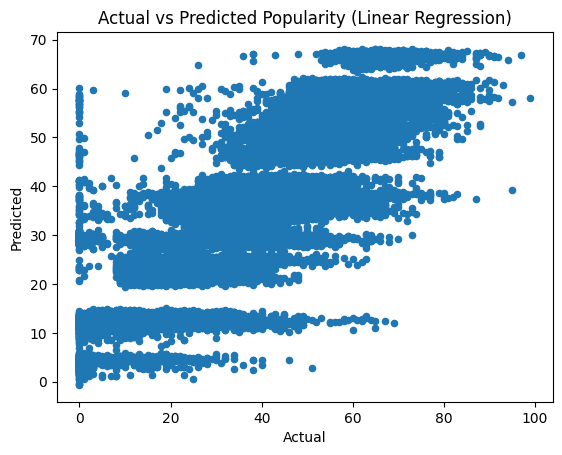

In [ ]:
import matplotlib.pyplot as plt
# Inițializăm modelul de regresie liniară
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# facem predicții pe setul de validare
linreg_Predict = linreg.predict(X_valid)

 # Calculăm scorul R-squared (R2) 
r2_score = linreg.score(X_valid, y_valid)
print(f"R-squared (R2) Score: {r2_score:.4f}")
print(f"Scorul R-squared pentru regresia liniara cu procentaj: {r2_score * 100:.4f}%")

# Calculăm eroarea medie pătratică (MSE)
mse = mean_squared_error(y_valid, linreg_Predict)
print(f"Eroarea media patratica (MSE): {mse:.4f}")
print(f"Eroarea media patratica (MSE) cu procentaj: {mse:.4f}%")

# Selectam o melodie random
random_song = df.sample(1)

specific_song_features = random_song[features]

# Prezicem scorul de popularitate
predicted_popularity = linreg.predict(specific_song_features)

print(f"Popularitate prezisa pentru melodia random: {predicted_popularity[0]:.2f}")
predicted_popularity_percentage = predicted_popularity[0] 
print(f"Popularitate prezisa pentru melodia random cu procentaj: {predicted_popularity_percentage:.4f}%")

# Obținem scorul de popularitate actual
actual_popularity = random_song['popularity'].values[0]
print(f"Popularitate actuala pentru melodia random: {actual_popularity:.4f}")

evaluation_linreg = pd.DataFrame({'Actual': y_valid, 'Predicted': linreg_Predict})
evaluation_linreg.plot(kind = 'scatter', x = 'Actual', y = 'Predicted', title = 'Actual vs Predicted Popularity (Linear Regression)')
plt.show()

## **Random Forrest Reggressor**

Scorul R-pătrat (R2): 0.7313
Scorul evaluării modelului RFR (R-pătrat) procentaj: 73.1299%
Eroarea medie pătratică: 89.3369
Popularitatea prezisă pentru melodia specifică: 85.62
Popularitatea actuală pentru melodia specifică: 100.00


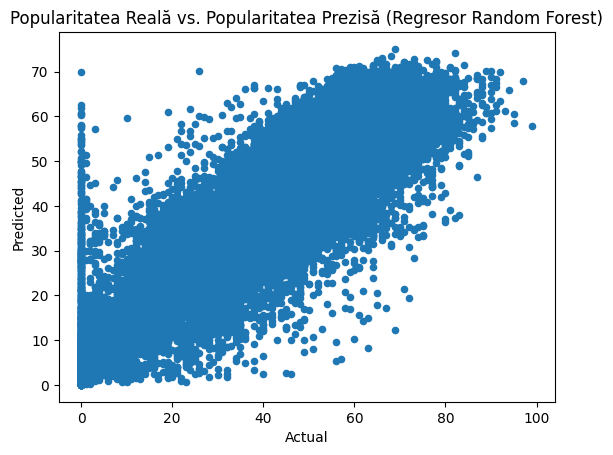

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Inițializăm modelul Regresor Random Forest cu hiperparametrii optimi
rfr = RandomForestRegressor(n_estimators=int(100), random_state=42)

# Antrenăm modelul
rfr.fit(X_train, y_train)

# Facem predicții pe setul de validare
rfr_Predict = rfr.predict(X_valid)

# Calculăm scorul R-pătrat (R2)
r2_score = rfr.score(X_valid, y_valid)
print(f"Scorul R-pătrat (R2): {r2_score:.4f}")
print(f"Scorul evaluării modelului RFR (R-pătrat) procentaj: {r2_score * 100:.4f}%")

# Calculăm eroarea medie pătratică (MSE)
mse = mean_squared_error(y_valid, rfr_Predict)
print(f"Eroarea medie pătratică: {mse:.4f}")

# Caracteristici specifice ale unei melodii
specific_song_features = df[df['track_name'] == '7 rings'][features]

# Prezicem scorul de popularitate
predicted_popularity = rfr.predict(specific_song_features)

print(f"Popularitatea prezisă pentru melodia specifică: {predicted_popularity[0]:.2f}")
predicted_popularity_percentage = predicted_popularity[0] 

# Obținem scorul de popularitate actual
actual_popularity = df[df['track_name'] == '7 rings']['popularity'].values[0]
print(f"Popularitatea actuală pentru melodia specifică: {actual_popularity:.2f}")

# Creăm un grafic pentru a compara valorile prezise cu cele reale
evaluare_rfr = pd.DataFrame({'Actual': y_valid, 'Predicted': rfr_Predict})
evaluare_rfr.plot(kind = 'scatter', x = 'Actual', y = 'Predicted', title = 'Popularitatea Reală vs. Popularitatea Prezisă (Regresor Random Forest)')
plt.show()	


R-squared (R2) Score: 0.7299
RFR Model evaluation score (R-squared) percentage: 72.9950%
Mean Squared Error: 89.7854
Predicted popularity for the specific song: 73.2235
Actual Popularity for the Specific Song: 100.0000


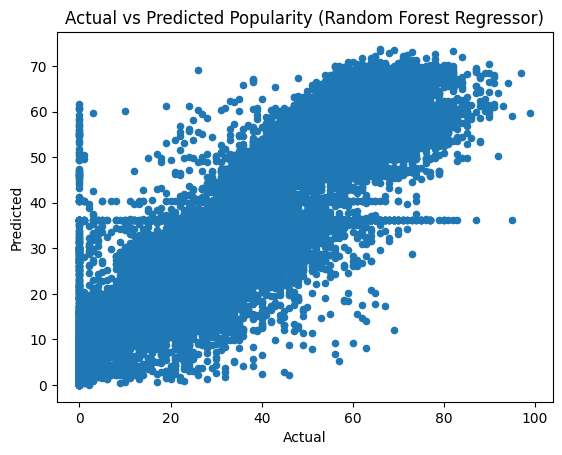

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model 
rfr = RandomForestRegressor(n_estimators=int(80), max_depth=int(19), random_state=42)
# Antrenăm modelul
rfr.fit(X_train, y_train)

# Facem predicții pe setul de validare
rfr_Predict = rfr.predict(X_valid)

# Calculăm scorul R-pătrat (R2)
r2_score = rfr.score(X_valid, y_valid)
print(f"Scorul R-pătrat (R2): {r2_score:.4f}")
print(f"Scorul evaluării modelului RFR (R-pătrat) procentaj: {r2_score * 100:.4f}%")

# Calculăm eroarea medie pătratică (MSE)
mse = mean_squared_error(y_valid, rfr_Predict)
print(f"Eroarea medie pătratică: {mse:.4f}")

# Caracteristici specifice ale unei melodii
specific_song_features = df[df['track_name'] == '7 rings'][features]

# Prezicem scorul de popularitate
predicted_popularity = rfr.predict(specific_song_features)

print(f"Popularitatea prezisă pentru melodia specifică: {predicted_popularity[0]:.2f}")
predicted_popularity_percentage = predicted_popularity[0] 

# Obținem scorul de popularitate actual
actual_popularity = df[df['track_name'] == '7 rings']['popularity'].values[0]
print(f"Popularitatea actuală pentru melodia specifică: {actual_popularity:.2f}")

# Creăm un grafic pentru a compara valorile prezise cu cele reale
evaluare_rfr = pd.DataFrame({'Actual': y_valid, 'Predicted': rfr_Predict})
evaluare_rfr.plot(kind = 'scatter', x = 'Actual', y = 'Predicted', title = 'Popularitatea Reală vs. Popularitatea Prezisă (Regresor Random Forest)')
plt.show()	

### **Verificarea popularității prezise cu RFR cu melodie nouă dat ca și exemplu**

In [ ]:
import pandas as pd

new_song_features = pd.DataFrame([{
    'acousticness': 0.5,
    'danceability': 0.7,
    'duration_ms': 200000,
    'energy': 0.8,
    'instrumentalness': 0.0,
    'key': 5,
    'liveness': 0.1,
    'mode': 1,
    'speechiness': 0.05,
    'tempo': 120.0,
    'time_signature': 4,
    'valence': 0.6,
    'genre_A Capella': 0,
    'genre_Alternative': 0,
    'genre_Anime': 0,
    'genre_Blues': 0,
    'genre_Children\'s Music': 0,
    'genre_Children’s Music': 0,
    'genre_Classical': 0,
    'genre_Comedy': 0,
    'genre_Country': 0,
    'genre_Dance': 0,
    'genre_Electronic': 0,
    'genre_Folk': 0,
    'genre_Hip-Hop': 0,
    'genre_Indie': 0,
    'genre_Jazz': 0,
    'genre_Movie': 0,
    'genre_Opera': 0,
    'genre_Pop': 1,
    'genre_R&B': 0,
    'genre_Rap': 0,
    'genre_Reggae': 0,
    'genre_Reggaeton': 0,
    'genre_Rock': 0,
    'genre_Ska': 0,
    'genre_Soul': 0,
    'genre_Soundtrack': 0,
    'genre_World': 0
}])

predicted_popularity = rfr.predict(new_song_features)
print(f"Popularitatea prezisă pentru noua melodie cu Random Forrest: {predicted_popularity[0]:.4f}")


Popularitatea prezisă pentru noua melodie cu Random Forrest: 68.1300


In [ ]:
import pandas as pd

new_song_features = pd.DataFrame([{
    'acousticness': 0.5,
    'danceability': 0.7,
    'duration_ms': 200000,
    'energy': 0.8,
    'instrumentalness': 0.0,
    'key': 5,
    'liveness': 0.1,
    'mode': 1,
    'speechiness': 0.05,
    'tempo': 120.0,
    'time_signature': 4,
    'valence': 0.6,
    'genre_A Capella': 0,
    'genre_Alternative': 0,
    'genre_Anime': 0,
    'genre_Blues': 0,
    'genre_Children\'s Music': 0,
    'genre_Children’s Music': 0,
    'genre_Classical': 0,
    'genre_Comedy': 0,
    'genre_Country': 0,
    'genre_Dance': 0,
    'genre_Electronic': 0,
    'genre_Folk': 0,
    'genre_Hip-Hop': 0,
    'genre_Indie': 0,
    'genre_Jazz': 0,
    'genre_Movie': 0,
    'genre_Opera': 0,
    'genre_Pop': 1,
    'genre_R&B': 0,
    'genre_Rap': 0,
    'genre_Reggae': 0,
    'genre_Reggaeton': 0,
    'genre_Rock': 0,
    'genre_Ska': 0,
    'genre_Soul': 0,
    'genre_Soundtrack': 0,
    'genre_World': 0
}])

predicted_popularity = linreg.predict(new_song_features)
print(f"Popularitatea prezisă pentru noua melodie cu Regresia Liniară: {predicted_popularity[0]:.4f}")


Popularitatea prezisă pentru noua melodie cu Regresia Liniară: 66.2991


Popularitatea prezisă pentru melodia aleatorie: 30.3302
Procentajul de popularitate prezis pentru melodia aleatorie: 30.33%
Popularitatea actuală pentru melodia aleatorie: 16.0000
Scorul R-pătrat (R2): 0.7040
Scorul de evaluare a modelului XGB (R-pătrat) procentaj: 70.4017%
Eroarea pătratică medie: 98.7754
Popularitatea prezisă pentru noua melodie: 65.0694


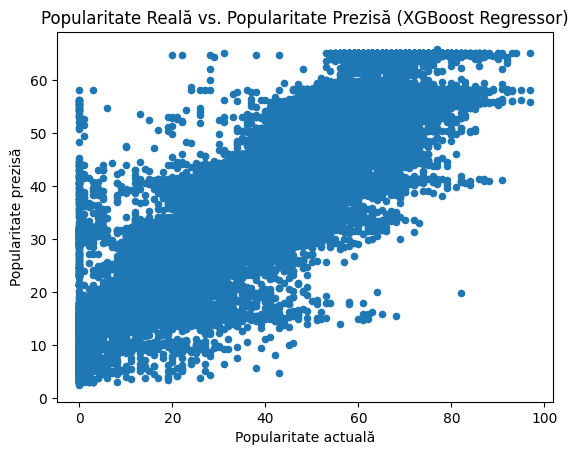

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# definim coloana țintă
target = 'popularity'
features = df.drop(target, axis=1)

# convertim coloanele categorice în numerice folosind LabelEncoder
label_encoders = {}
for column in ['artist_name', 'track_name', 'track_id', 'key', 'mode', 'time_signature']:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))
    label_encoders[column] = le

# împărțim datele în setul de antrenare și setul de testare
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# inițializăm modelul XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

# antrenăm modelul
xgb.fit(X_train, y_train)

# facem predicții pe setul de testare
xgb_Predict = xgb.predict(X_test)

# selectăm o melodie aleatorie
random_song = df.sample(1)

# preprocesăm melodia aleatorie
for column, le in label_encoders.items():
    random_song[column] = le.transform(random_song[column].astype(str))

random_song_features = random_song.drop(target, axis=1)

# facem predicții pentru popularitatea melodiei aleatorie
predicted_popularity = xgb.predict(random_song_features)

# afisam popularitatea prezisă pentru melodia aleatorie
print(f"Popularitatea prezisă pentru melodia aleatorie: {predicted_popularity[0]:.4f}")
predicted_popularity_percentage = predicted_popularity[0] 
print(f"Procentajul de popularitate prezis pentru melodia aleatorie: {predicted_popularity_percentage:.2f}%")

# obținem popularitatea actuală a melodiei aleatorie
actual_popularity = random_song[target].values[0]
print(f"Popularitatea actuală pentru melodia aleatorie: {actual_popularity:.4f}")

# calculăm scorul R-squared (R2)
r2_score = xgb.score(X_test, y_test)
print(f"Scorul R-pătrat (R2): {r2_score:.4f}")
print(f"Scorul de evaluare a modelului XGB (R-pătrat) procentaj: {r2_score * 100:.4f}%")

# calculăm eroarea pătratică medie (MSE)
mse = mean_squared_error(y_test, xgb_Predict)
print(f"Eroarea pătratică medie: {mse:.4f}")

# evaluăm modelul XGBoost Regressor
new_song_features = pd.DataFrame([{
    'acousticness': 0.5,
    'danceability': 0.7,
    'duration_ms': 200000,
    'energy': 0.8,
    'instrumentalness': 0.0,
    'key': 5,
    'liveness': 0.1,
    'mode': 1,
    'speechiness': 0.05,
    'tempo': 120.0,
    'time_signature': 4,
    'valence': 0.6,
    'genre_A Capella': 0,
    'genre_Alternative': 0,
    'genre_Anime': 0,
    'genre_Blues': 0,
    'genre_Children\'s Music': 0,
    'genre_Children’s Music': 0,
    'genre_Classical': 0,
    'genre_Comedy': 0,
    'genre_Country': 0,
    'genre_Dance': 0,
    'genre_Electronic': 0,
    'genre_Folk': 0,
    'genre_Hip-Hop': 0,
    'genre_Indie': 0,
    'genre_Jazz': 0,
    'genre_Movie': 0,
    'genre_Opera': 0,
    'genre_Pop': 1,
    'genre_R&B': 0,
    'genre_Rap': 0,
    'genre_Reggae': 0,
    'genre_Reggaeton': 0,
    'genre_Rock': 0,
    'genre_Ska': 0,
    'genre_Soul': 0,
    'genre_Soundtrack': 0,
    'genre_World': 0
}])

# caracteristicile melodiei noi
for column, le in label_encoders.items():
    if column in new_song_features:
        new_song_features[column] = le.transform(new_song_features[column].astype(str))

# completăm coloanele lipsă cu 0
missing_cols = set(X_train.columns) - set(new_song_features.columns)
for col in missing_cols:
    new_song_features[col] = 0
new_song_features = new_song_features[X_train.columns]

# facem predicții pentru popularitatea melodiei noi
predicted_popularity_new_song = xgb.predict(new_song_features)
print(f"Popularitatea prezisă pentru noua melodie: {predicted_popularity_new_song[0]:.4f}")

evaluare_xgb = pd.DataFrame({'Popularitate actuală': y_test, 'Popularitate prezisă': xgb_Predict})
evaluare_xgb.plot(kind='scatter', x='Popularitate actuală', y='Popularitate prezisă', title='Popularitate Reală vs. Popularitate Prezisă (XGBoost Regressor)')
plt.show()


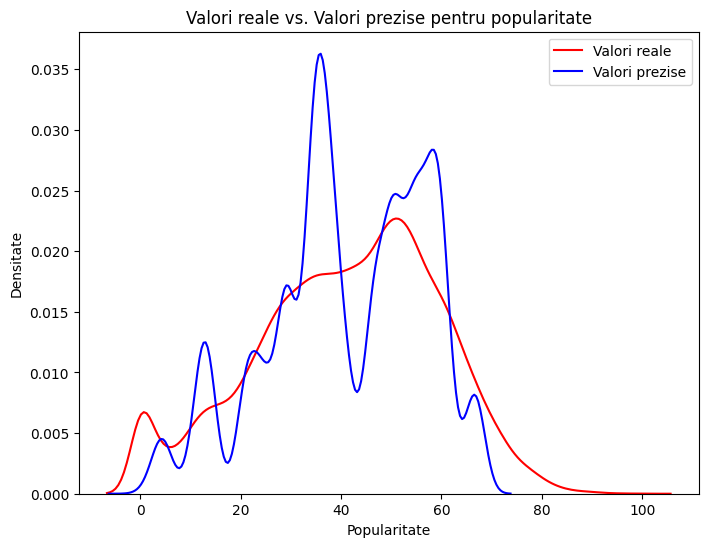

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facem predicții pe setul de validare
linreg_Predict = linreg.predict(X_valid)

# Creăm un grafic pentru a compara valorile prezise cu cele reale
plt.figure(figsize=(8, 6))
sns.kdeplot(y_valid, color="r", label="Valori reale")
sns.kdeplot(linreg_Predict, color="b", label="Valori prezise")
plt.title("Valori reale vs. Valori prezise pentru popularitate")
plt.xlabel("Popularitate")
plt.ylabel("Densitate")
plt.legend()
plt.show()

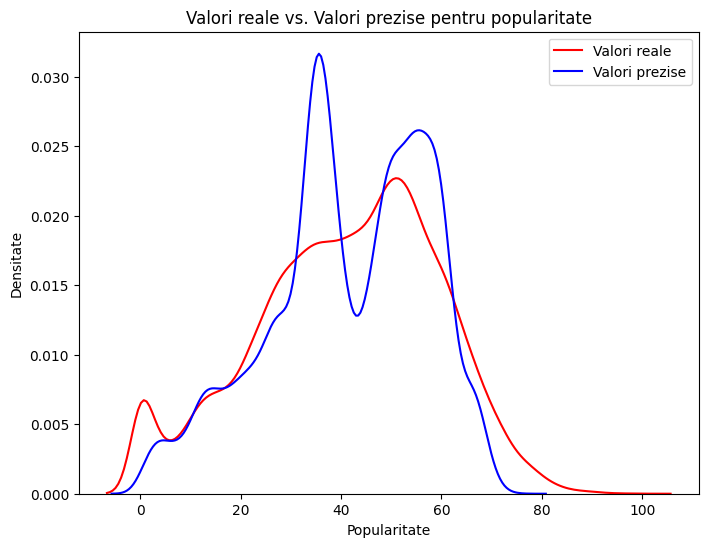

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facem predicții pe setul de validare
rf_predict = rfr.predict(X_valid)

# Creăm un grafic pentru a compara valorile prezise cu cele reale
plt.figure(figsize=(8, 6))
sns.kdeplot(y_valid, color="r", label="Valori reale")
sns.kdeplot(rf_predict, color="b", label="Valori prezise")
plt.title("Valori reale vs. Valori prezise pentru popularitate")
plt.xlabel("Popularitate")
plt.ylabel("Densitate")
plt.legend()
plt.show()


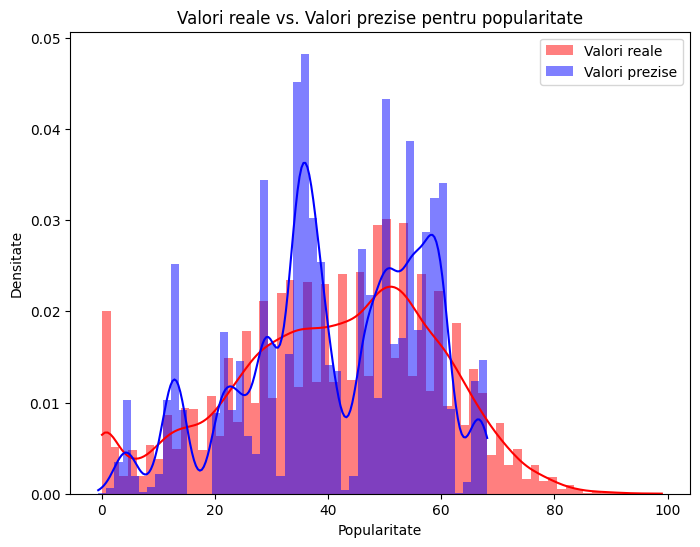

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facem predicții pe setul de validare
linreg_Predict = linreg.predict(X_valid)

# Creăm un grafic pentru a compara valorile prezise cu cele reale
plt.figure(figsize=(8, 6))
sns.histplot(y_valid, color="r", label="Valori reale", kde=True, stat="density", linewidth=0)
sns.histplot(linreg_Predict, color="b", label="Valori prezise", kde=True, stat="density", linewidth=0)
plt.title("Valori reale vs. Valori prezise pentru popularitate")
plt.xlabel("Popularitate")
plt.ylabel("Densitate")
plt.legend()
plt.show()

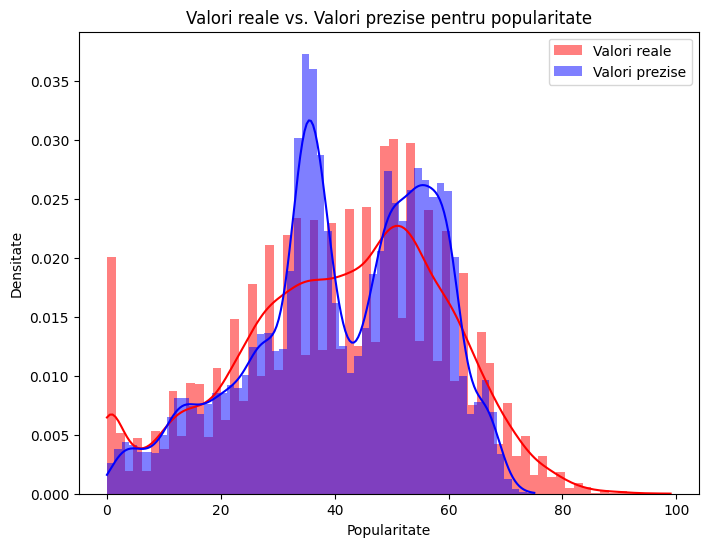

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facem predicții pe setul de validare
rf_predict = rfr.predict(X_valid)

# Creăm un grafic pentru a compara valorile prezise cu cele reale
plt.figure(figsize=(8, 6))
sns.histplot(y_valid, color="r", label="Valori reale", kde=True, stat="density", linewidth=0)
sns.histplot(rf_predict, color="b", label="Valori prezise", kde=True, stat="density", linewidth=0)
plt.title("Valori reale vs. Valori prezise pentru popularitate")
plt.xlabel("Popularitate")
plt.ylabel("Densitate")
plt.legend()
plt.show()


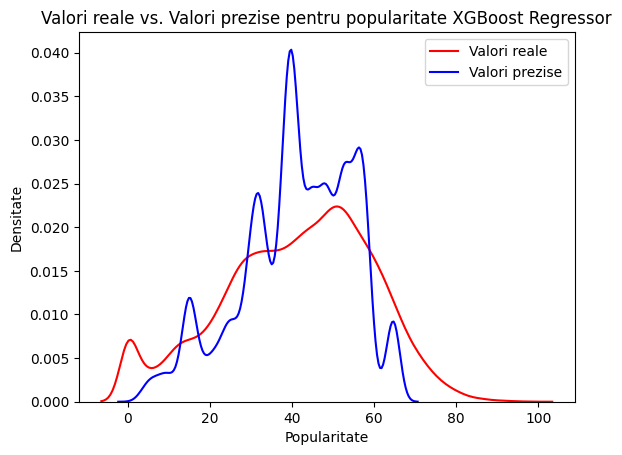

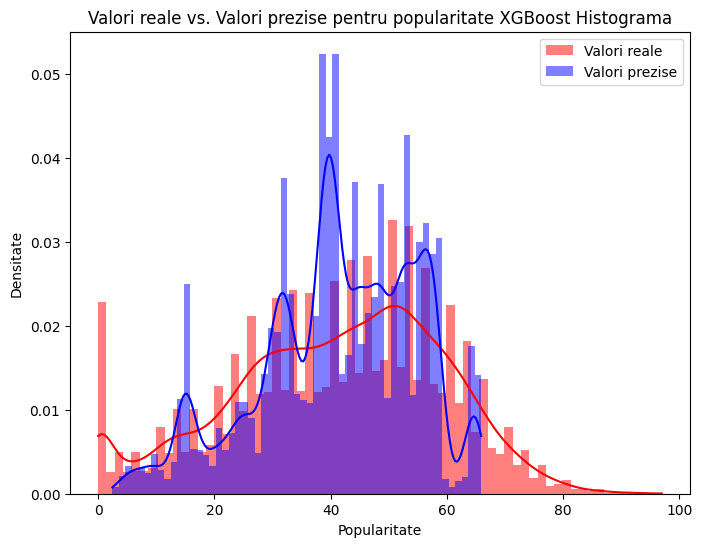

In [ ]:

sns.kdeplot(y_test, color="r", label="Valori reale")
sns.kdeplot(xgb_Predict, color="b", label="Valori prezise")
plt.title("Valori reale vs. Valori prezise pentru popularitate XGBoost Regressor")
plt.xlabel("Popularitate")
plt.ylabel("Densitate")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(y_test, color="r", label="Valori reale", kde=True, stat="density", linewidth=0)
sns.histplot(xgb_Predict, color="b", label="Valori prezise", kde=True, stat="density", linewidth=0)
plt.title("Valori reale vs. Valori prezise pentru popularitate XGBoost Histograma")
plt.xlabel("Popularitate")
plt.ylabel("Densitate")
plt.legend()
plt.show()


## **Optimizarea hiperparametrilor**

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validare pentru regresia liniara
lr_cv_scores = cross_val_score(linreg, X_train, y_train, cv=3, scoring='r2')

# Cross-validare pentru Random Forest Regressor
#rfr_cv_scores = cross_val_score(rfr, X_train, y_train, cv=3, scoring='r2')

# Cross-validare pentru XGBoost Regressor
xgb_cv_scores = cross_val_score(xgb, X_train, y_train, cv=3, scoring='r2')

print("Cross-validare pentru regresie liniara R^2:", lr_cv_scores.mean())
#print("Cross-validare pentru Random Forest Regressor R^2:", rfr_cv_scores.mean())
print("Cross-validare pentru XGBoost Regressor R^2:", xgb_cv_scores.mean())


Cross-validare pentru regresie liniara R^2: 0.722072304283278
Cross-validare pentru XGBoost Regressor R^2: 0.7025657193360368


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from hyperopt import fmin, tpe, hp

# Definiți funcția obiectiv pentru optimizarea Bayesiană
def objective(params):
    n_estimators = int(params['n_estimators'])
    max_depth = int(params['max_depth'])
    rfmodel = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rfmodel.fit(X_train, y_train)
    mse = np.mean((rfmodel.predict(X_valid) - y_valid) ** 2)
    return mse

# Definiți spațiul de căutare pentru hiperparametri
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 20, 1)
}

# Rulați optimizarea Bayesiană
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=5)

# Afișați cei mai buni hiperparametri găsiți
print("Cei mai buni hiperparametri:")
print(best)



100%|██████████| 5/5 [09:21<00:00, 112.22s/trial, best loss: 0.10138147092311373]
Cei mai buni hiperparametri:
{'max_depth': 19.0, 'n_estimators': 80.0}


In [ ]:
# Antrenăm modelul Random Forest Regressor cu hiperparametrii optimi
model = RandomForestRegressor(n_estimators=80, max_depth=19, random_state=42)
model.fit(X_train, y_train)

# Obținem importanța caracteristicilor
feature_importances = model.feature_importances_

# Creăm un DataFrame cu caracteristicile și importanța lor
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sortăm valorile în ordine descrescătoare
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Afișăm cele mai importante 10 caracteristici
print(feature_importance_df.head(10))


             Feature  Importance
0       acousticness    0.159789
4   instrumentalness    0.107665
2        duration_ms    0.107397
11           valence    0.102232
1       danceability    0.101840
8        speechiness    0.099416
9              tempo    0.092344
3             energy    0.090035
6           liveness    0.086597
5                key    0.038896


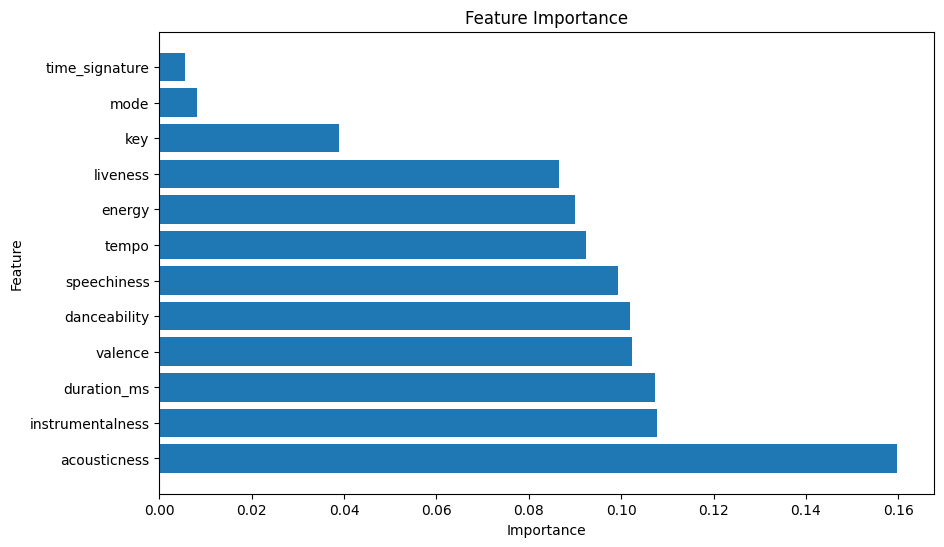

In [ ]:
import matplotlib.pyplot as plt

# Creăm un grafic pentru a afișa importanța caracteristicilor la modelul Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Regressor')
plt.show()


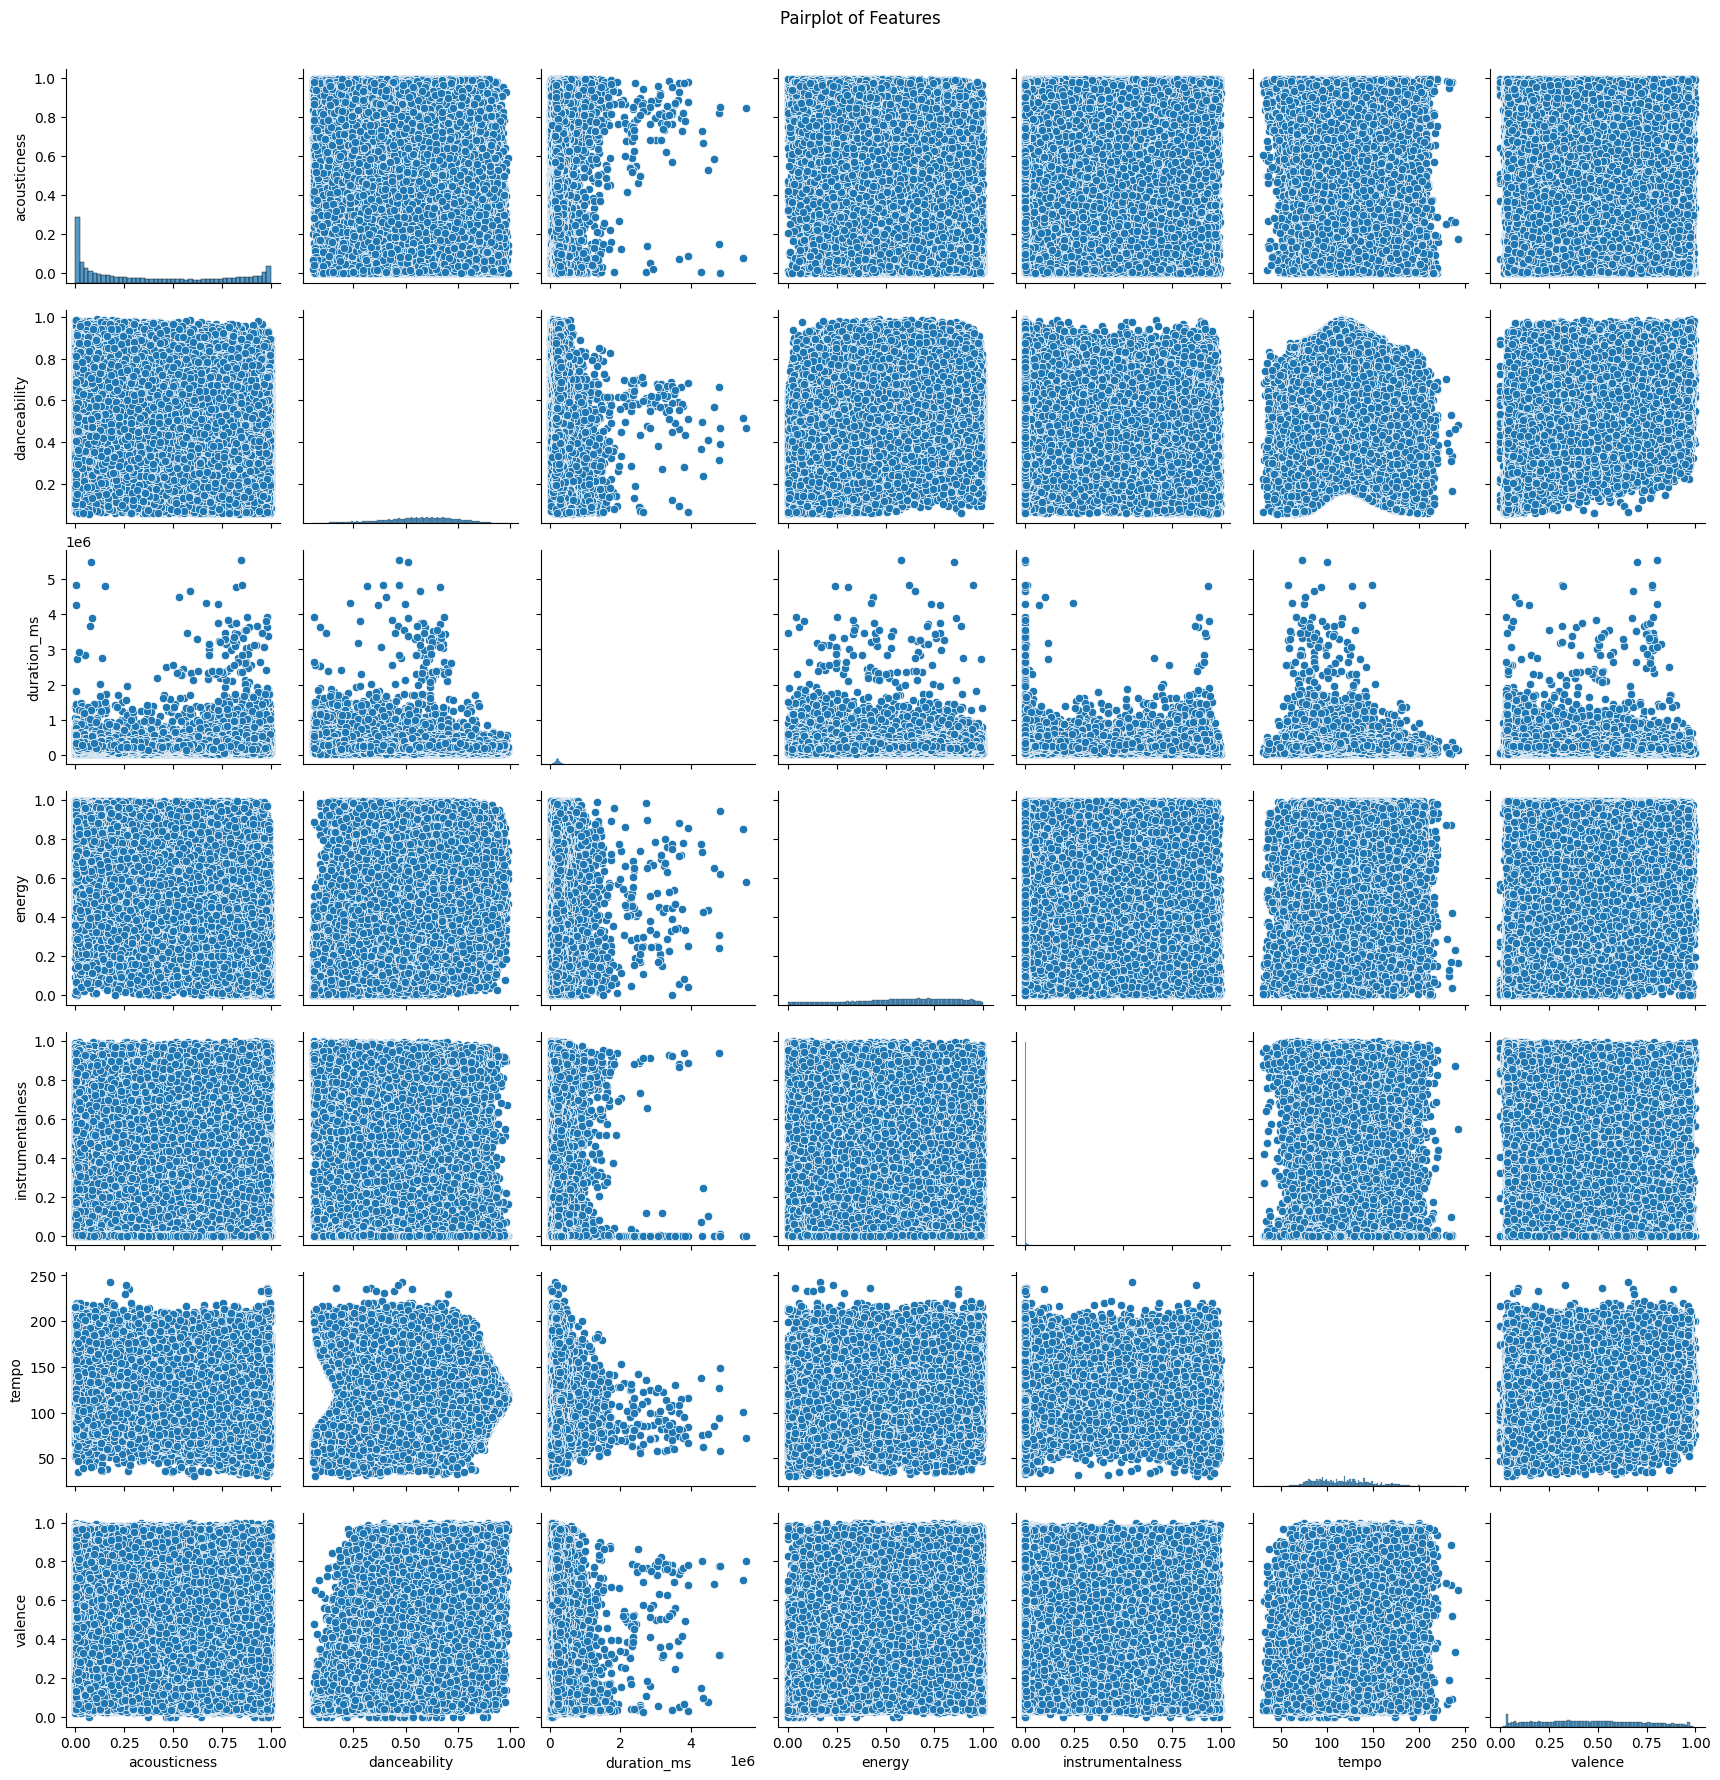

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Pairplot pemtru a vizualiza relațiile dintre caracteristici
sns.pairplot(df, vars=['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'tempo', 'valence'], kind='scatter')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



In [ ]:
# afisam curba de invatare pentru modelul XGBoost
title = "Learning Curve (XGBoost)"
plot_learning_curve(xgb, title, X_train, y_train, cv=None, n_jobs=-1)
plt.show()

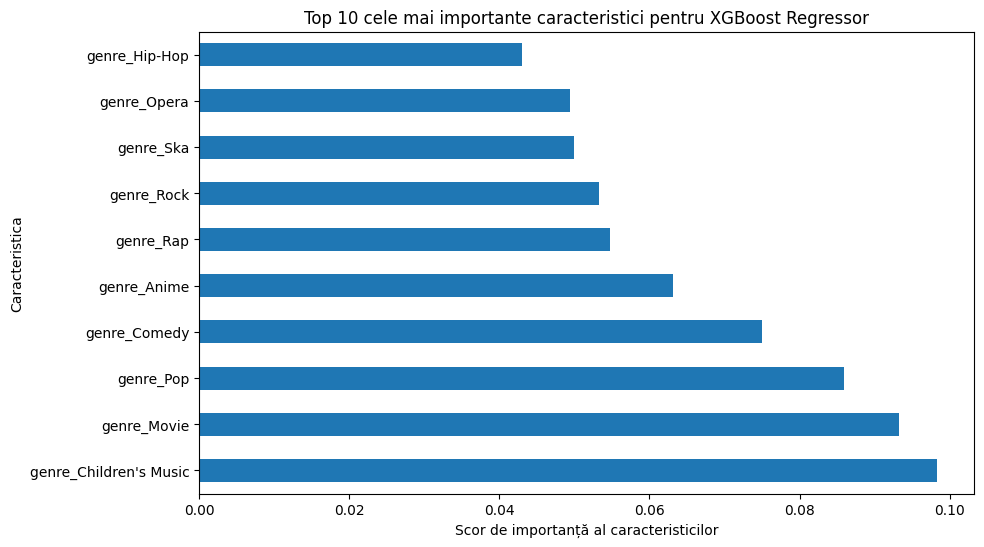

In [ ]:
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 cele mai importante caracteristici pentru XGBoost Regressor")
plt.xlabel("Scor de importanță al caracteristicilor") 
plt.ylabel("Caracteristica")
plt.show()


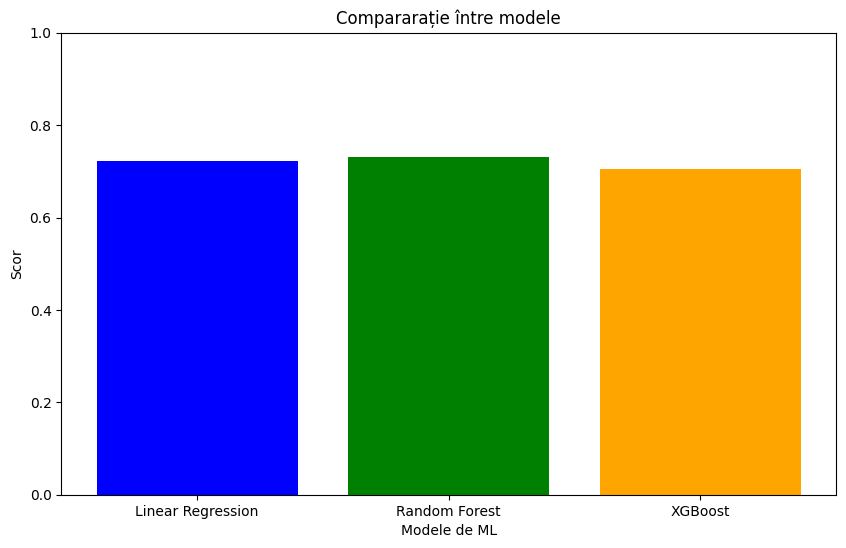

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'XGBoost']
scores = [linreg.score(X_valid, y_valid), rfr.score(X_valid, y_valid), xgb.score(X_test, y_test)]

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'orange'])
plt.title('Compararație între modele')
plt.xlabel('Modele de ML')
plt.ylabel('Scor')
plt.ylim(0, 1)  
plt.show()
